# exploratory data analysis (EDA)



In [142]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()


In [154]:
# nyt ads' clicks, and some kind of funnel
# gender: 0=female
# signed_in: 0=false, 1=true

raw_data = pd.read_csv('dataset/nyt_cads_clicks_2012/nyt1.csv')

raw_data['isClicked'] = raw_data['Clicks'].map({1:True, 0:False, 2:True, 3:True, 4:True})   
raw_data['isSigned'] = raw_data['Signed_In'].map({1:True, 0:False})  # misleading our understanding


raw_data.head()

,Age,Gender,Impressions,Clicks,Signed_In,isClicked,isSigned
0,36,0,3,0,1,False,True
1,73,1,3,0,1,False,True
2,30,0,3,0,1,False,True
3,49,1,3,0,1,False,True
4,47,1,11,0,1,False,True


## Understanding What we got

a row, sees 11 times an Ads, 
 and clicks 1 time to that Ads or same Ads (i do not know), BOOLEAN - Goal !
 then may be, he clicks Signed_In button or not ! boolean!!! - Goal

- no missing values in data. it was already cleaned data, so it is also _misleading_
- age contains 0 values. median 31, close to mean (29.5).
- gender **%36 male**. 
- impressions, mean (5) = median (5). Has outliers (positive skewed) - %75 is 6 but max 20. 
    - **an average user sees 5 times Ads**
- signed_in is boolean (infact) !  true is most common (that means users are forced to signed in or not new users.  
    - so i generated isSigned
- clicks is number but mostly 1 times! it may skew some calculations, so >1 clicks may be mapped to 1 (isSigned)
    - so we can generate another feature. isClicked, false is most common. **%8.6 Ads-Click-Rate**
    - is Ads, same or not. i do not know

In [155]:
raw_data.describe(include='all')


,Age,Gender,Impressions,Clicks,Signed_In,isClicked,isSigned
count,458441.000000,458441.000000,458441.000000,458441.000000,458441.000000,458441,458441
unique,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,False,True
freq,NaN,NaN,NaN,NaN,NaN,418603,321335
mean,29.482551,0.367037,5.007316,0.092594,0.700930,NaN,NaN
std,23.607034,0.481997,2.239349,0.309973,0.457851,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,3.000000,0.000000,0.000000,NaN,NaN
50%,31.000000,0.000000,5.000000,0.000000,1.000000,NaN,NaN
75%,48.000000,1.000000,6.000000,0.000000,1.000000,NaN,NaN


## enrichment - calculated columns

#### Create a new variable, 
    - age_group to categorize “<18", "18-24", "25-34", "35-44", "45-54", "55-64", and "65+"
    - CTR = clicks / impressions
    - CTA = signed_in / clicks

In [156]:
data = raw_data

data.loc[data.Age < 18, 'Age_Group'] = '<18'
data.loc[(data.Age >= 18) & (data.Age <= 24), 'Age_Group'] = '18-24'
data.loc[(data.Age >= 25) & (data.Age <= 34), 'Age_Group'] = '25-34'
data.loc[(data.Age >= 35) & (data.Age <= 44), 'Age_Group'] = '35-44'
data.loc[(data.Age >= 45) & (data.Age <= 64), 'Age_Group'] = '55-64'
data.loc[(data.Age >= 65), 'Age_Group'] = '65+'

data.head()

,Age,Gender,Impressions,Clicks,Signed_In,isClicked,isSigned,Age_Group
0,36,0,3,0,1,False,True,35-44
1,73,1,3,0,1,False,True,65+
2,30,0,3,0,1,False,True,25-34
3,49,1,3,0,1,False,True,55-64
4,47,1,11,0,1,False,True,55-64


In [157]:
data['CTR'] = data.Clicks/data.Impressions #Clicks>1 skews this calculation ?. at least that is very low impact!


data.head(10)

,Age,Gender,Impressions,Clicks,Signed_In,isClicked,isSigned,Age_Group,CTR
0,36,0,3,0,1,False,True,35-44,0.000000
1,73,1,3,0,1,False,True,65+,0.000000
2,30,0,3,0,1,False,True,25-34,0.000000
3,49,1,3,0,1,False,True,55-64,0.000000
4,47,1,11,0,1,False,True,55-64,0.000000
5,47,0,11,1,1,True,True,55-64,0.090909
6,0,0,7,1,0,True,False,<18,0.142857
7,46,0,5,0,1,False,True,55-64,0.000000
8,16,0,3,0,1,False,True,<18,0.000000
9,52,0,4,0,1,False,True,55-64,0.000000


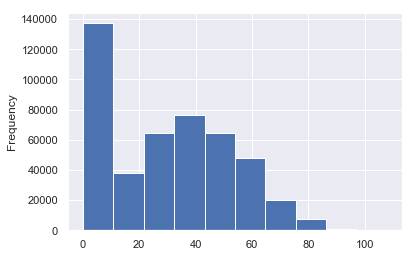

In [75]:
data.Age.plot.hist()

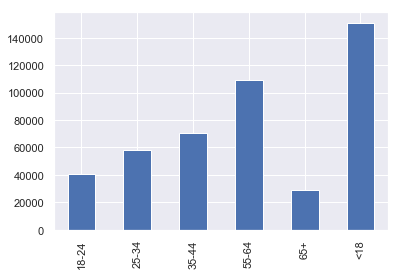

In [78]:
data['Age_Group'].value_counts().sort_index().plot(kind='bar')

#### Plot the distributions of number impressions and click-through-rate (CTR=# clicks/# impressions) for these six age categories
 

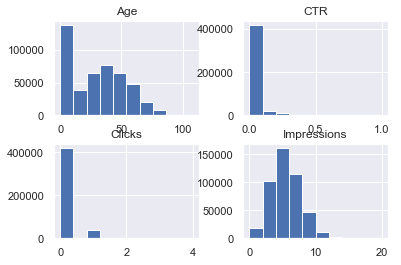

In [174]:
x = data.hist(column=['Age', 'Impressions', 'Clicks', 'CTR'])
